# Image Compress 1

In [14]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
data = io.imread('./bird_small.png')
data.shape

(128, 128, 3)

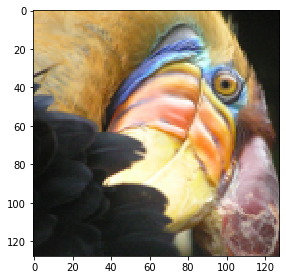

In [3]:
io.imshow(data)

# Serialize image

In [4]:
X = data / 255 # normalize value
X = X.reshape(data.shape[0] * data.shape[1], data.shape[2])
X[0]

Array([0.85882353, 0.70588235, 0.40392157])

# Random initialise centroids
As the figures shows above, the number of clusters is better to be 3.

In [5]:
def random_centroids(X, K):
    random_index = np.random.choice(X.shape[0], K)
    init_centroids = X[random_index]
    return init_centroids

In [6]:
K = 16
init_centroids = random_centroids(X, K)
init_centroids.shape

(16, 3)

# Cluster assignment step
$c^{(i)}$ is the index (from 1 to K) of the cluster centroid which is cloest to $x^{(i)}$.

In [7]:
def find_cloest_centroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    
    dist_arr = np.zeros(m) + np.inf
    c_indices = np.zeros(m)
    
    for i in range(m):
        for j in range(K):
            dist = np.power(X[i] - centroids[j], 2).sum()
            
            if dist < dist_arr[i]:
                dist_arr[i] = dist
                c_indices[i] = j
    
    return c_indices.astype(int)

# Move centroid step
$\mu_{k}$ is the average of points assigned to cluster $k$.

In [8]:
def compute_centroids(X, c_indices, K):
    m, n = X.shape
    centroids = np.zeros((K, n))    
    
    for i in range(K):
        indices = np.where(c_indices == i)[0]
        avg_inst = np.sum(X[indices], axis=0) # (1,2) column sum
        centroids[i] = avg_inst / indices.shape[0] 
        
    return centroids   

# Optimize step
The cost function of K means algorithm is also known as Distortion function.
$$
J\left(c^{(1)}, \ldots, c^{(m)}, \mu_{1}, \ldots, \mu_{K}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X^{(i)}-\mu_{c}(i)\right\|^{2}
$$

In [9]:
def run_k_means(X, init_centroids, max_iters):
    centroids = init_centroids
    K = init_centroids.shape[0]
    
    for i in range(max_iters):
        c_indices = find_cloest_centroids(X, centroids)
        centroids = compute_centroids(X, c_indices, K)
        
    return c_indices, centroids

In [10]:
c_indices, centroids = run_k_means(X, init_centroids, 10)
centroids[:3]

array([[0.56188292, 0.47404761, 0.42765008],
       [0.37215927, 0.32604836, 0.32097197],
       [0.26647876, 0.23269199, 0.21653595]])

In [11]:
compressed_img = centroids[c_indices] # pixels map to 16 different colour (clusters)
compressed_img = compressed_img.reshape(data.shape)

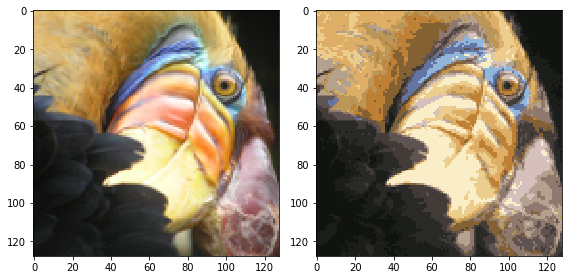

In [15]:
plt.subplots(figsize=(8,8))
plt.subplot(121)
io.imshow(data)
plt.subplot(122)
io.imshow(compressed_img)